This notebook will walk you through writing your first quantum program, and running it on quantum devices in the cloud! Let's start with some setup.

Before you read further: one of the great features of Jupyter notebooks is that you can run code inside them: to run a cell containing code, press Shift+Enter.

<h1 style="color:MediumSeaGreen;">Setup</h1>

In [1]:
import qbraid

<h2 style="color:MediumSeaGreen;">Installing the qBraid-SDK environment</h2>

- At the very top of the right sidebar, click on the **ENVS** icon;
- In the window that opens, click on **ADD** at the top right;
- Look for qBraid-SDK in the list of environments. If the environment appears "locked", click on the **CREDITS** button in the navigation bar at the top. Insert the Access Key 'EHNU6626'. Then, come back, and refresh this webpage.
- Click on the dropdown arrow on qBraid-SDK, and then on **install**. This will install the environment in your virtual workspace (this may take a minute).
- Once the installation is complete, you should see qBraid-SDK in the list of environment upon clicking on **ENVS**.

<h2 style="color:MediumSeaGreen;">Switching the "kernel" of your Jupyter notebook</h2>

Each notebook (like the one you reading right now) is powered by a "kernel", i.e. a backend, that enables it to run the code that appears in the notebook. We want to switch to a kernel where all of the necessary packages to run on quantum devices are already installed.

- At the top right of this notebook, click where it says "Python 3 [Default]" (this is most likely what you will see unless you have already switched to a different kernel). A dropdown menu will appear (where Python 3 [Default] is one of the options). You should now also see the option "Python 3 [qBraid]". Select this.
- In the navigation bar at the top, go to **Kernel**, and then **Restart Kernel**.

<h1 style="color:MediumSeaGreen;">Your first quantum program</h1>

To write and run quantum programs, we will be using the Python package *Qiskit*: this is developed by IBM and lets us build and run quantum circuits on IBM's very own quantum computer.

Using other packages we will be able to "convert" circuits written in qiskit to circuits that we can run on other quantum devices.

A very important thing to note is that you can also *simulate* quantum circuits of small enough size on classical computers: recall that performing quantum gates is nothing other than multiplying matrices and vectors. Such calculations can certainly be performed by a classical computer! The catch is that they very quickly become intractable as the size of the quantum circuits being simulated grows. qiskit also provides a functionality for simulating quantum circuits. You will mostly be running classical simulations of the quantum circuits that you write, but you will sometimes run them on actual quantum devices as part of your homeworks. Once you have written the code for a simulation of a quantum circuit, running it on an actual quantum device will be as simple as changing one argument in your code. 

Let's build our first quantum circuit, which does the following: starting from a qubit in the state $\left| 0 \right \rangle$, it applies a Hadamard gate, and then measures.

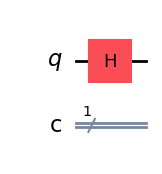

In [2]:
# qiskit contains the class QuantumCircuit with which you can build quantum circuits.
# So, the first step is to import this class
from qiskit import QuantumCircuit

# An object from the QuantumCircuit class is initialized by specifying two numbers.
circ = QuantumCircuit(1, 1)
# The first argument '1' specifies the number of qubits in our QuantumCircuit object, 1 in this case.
# The second argument '1' specifies that we will be storing a single classical bit
# of output from our future measurement, i.e. we will measure a single qubit.

# To add a Hadamard gate we use the function 'h' of QuantumCircuit:
circ.h(0)

# In the above line, circ is the circuit we just created, and we are inserting the hadamard gate using '.h(0)'
# The '0' in the argument specifies that we want the gate to be applied on the zeroth qubit.
# And yes, the qubit numbering starts at 0, as is typical in Python.

# At this point we already have a quantum circuit ready. We can "draw" it by using the function 'draw'
circ.draw(output="mpl")

The circuit above is the quantum circuit we specified. The bottom wire just reminds us that we will be storing one bit from the output of our measurement.

So far we have only drawn the quantum circuit. To actually run the circuit and measure its output we will make use of two additional modules in qiskit: "Aer" and "execute". But first, let's add the measurement operation in our circuit.

In [3]:
circ.measure(0, 0)
# The first argument specifies that we are measuring the first qubit (Python starts counting
# from zero), and the second argument specifies that we are storing the output
# of this measurement in the first output bit.

# Import Aer and execute
from qiskit_aer import AerSimulator

# The Aer module contains many simulators. We will be using one called AerSimulator.
# By convention, we refer to the simulator (or the actual quantum computer) as a backend.
# and if you wanted to run your quantum circuit on an actual quantum computer, you would just need to replace
# 'AerSimulator' with the name of the quantum computer.
backend_sim = AerSimulator()

# Once you specify the backend, you can just go ahead and execute the circuit with the function "run".
sim = backend_sim.run(circ, shots=1000)
# Shots specifies how many times the quantum circuit is run.

# The results from the execution are stored in 'sim' and can be obtained using
sim_result = sim.result()

# From the result object we can get the count of the 0s and 1s from the circuit
counts = sim_result.get_counts(circ)
print(counts)

{'1': 493, '0': 507}


We ran the quantum circuit 1000 times. As you could expect, we got outcomes '0' and '1' roughly with a 50-50 split. We can plot the outcomes stored in the variable 'counts' using the following code:

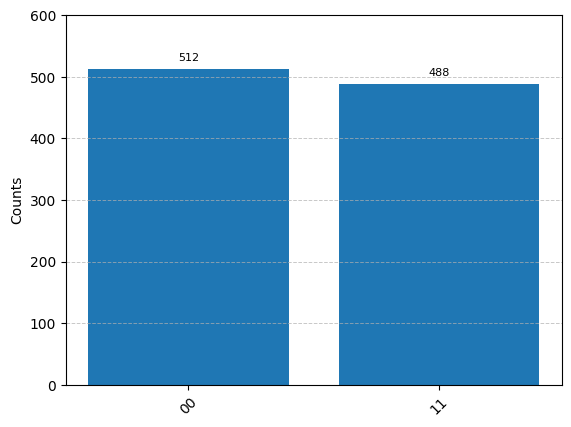

In [8]:
from qbraid.visualization import plot_histogram

plot_histogram(counts)

<h2 style="color:MediumSeaGreen;">More single qubit gates</h2>

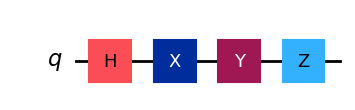

In [4]:
circ = QuantumCircuit(
    1
)  # we omit the second argument as we will just draw the circuit,
# without measuring.

circ.h(0)  # Adds a Hadamard on the zeroth qubit.

circ.x(0)  # Pauli X

circ.y(0)  # Pauli Y

circ.z(0)  # Pauli Z

circ.draw(output="mpl")

<h2 style="color:MediumSeaGreen;">Circuits of multiple qubits</h2>

Next, we'll build a circuit involving multiple qubits and multi-qubit gates.

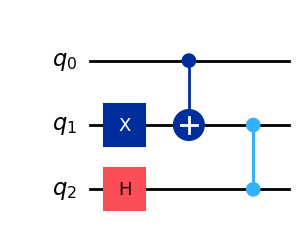

In [5]:
circ = QuantumCircuit(3)  # the first argument specifies that we are building a circuit
# of 3 qubits.

circ.h(2)  # Adds a Hadamard on the third qubit (Python starts counting from zero..)

circ.x(1)  # Adds a Pauli X on the second qubit

circ.cx(0, 1)  # Adds a CNOT gate on control qubit 0 and target qubit 1.

circ.cz(1, 2)  # Adds a Controlled-Z gate on control qubit 1 and target qubit 2.

circ.draw(output="mpl")

Here's another example. We'll run a circuit that creates the EPR pair $\frac{1}{\sqrt{2}}\left| 00 \right\rangle + \frac{1}{\sqrt{2}}\left| 11 \right\rangle$ and then measures both qubits.

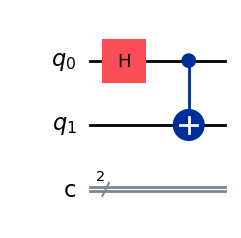

In [6]:
circ = QuantumCircuit(2, 2)  # the first argument specifies that we are building a circuit
# of 2 qubits.
# The second argument specifies that we'll be measuring both qubits.

circ.h(0)  # Adds a Hadamard on the first qubit (Python starts counting from zero..)

circ.cx(0, 1)  # Adds a CNOT gate on control qubit 0 and target qubit 1.

circ.draw(output="mpl")

Next, we measure both qubits and plot the outputs.

{'11': 546, '00': 454}


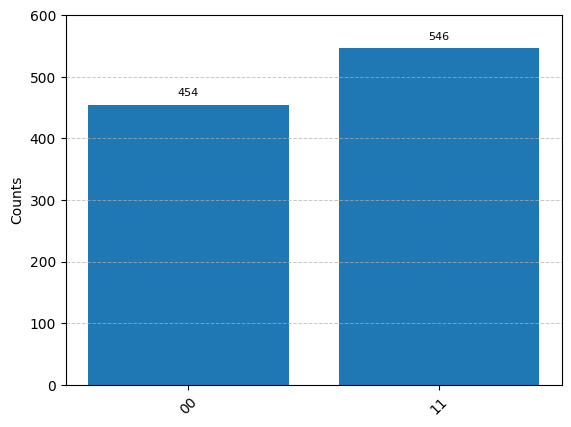

In [9]:
circ.measure([0, 1], [1, 0])
# The first argument specifies the list of qubits that we are measuring,
# The second argument specifies the list of output bits (created earlier) in which we will store the outcomes,
# Notice that we have reversed the second list: this is because by convention qiskit orders the classical bits in reverse relative to the qubits.
# We recommend always reversing the list of classical bits, so that the qubits and classical output bits are ordered in the same way.

# We go ahead and execute the circuit with the function "run".
sim = backend_sim.run(circ, shots=1000)
# Recall that shots specifies how many times the quantum circuit is run.

# The results from the execution are stored in 'sim' and can be obtained using
sim_result = sim.result()
# From the result object we can get the count of the 0s and 1s from the circuit
counts = sim_result.get_counts(circ)
print(counts)

# We plot the outcomes stored in the variable 'counts':
plot_histogram(counts)

As expected, the output is roughly evenly split between the strings '00' and '11'.

<h1 style="color:MediumSeaGreen;">Running on actual quantum devices!</h1>

Current quantum devices are relatively small and noisy, and, most importantly, so far still unable to demonstrate a speedup on a useful computational problem. Nonetheless, it is very exciting to live in a time where quantum devices are coming to life, and we can even interact with some of them remotely! Let's see how to do this.

One convenient feature of the qBraid SDK is that it allows you to write your quantum circuit *once*, and run it most of the available quantum devices (from IBM, Rigetti, Xanadu, QuEra, Oxford Quantum Circuits, IonQ).

<h2 style="color:MediumSeaGreen;">Getting information about available quantum devices</h2>

We can obtain information about the supported quantum devices using the "get_devices" function, as in the cell below. This returns information about the current status of supported devices (whether they are currently available to run quantum jobs or not), as well as their "qBraid ID", which you will need to include in your code when submitting a quantum job. You can also see the status of quantum devices by clicking on the "DEVICES" in the sidebar on the right.

There is a chance you might get the error "No module named qbraid" when running the cell below. If you do, just switch your kernel back to `Python 3 [Default]` momentarily, and then switch back to `Python 3 [qBraid]`. This should fix the issue.

In [10]:
from qbraid import get_devices

get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Brisbane,ibm_q_brisbane,●
IBM,Ext. stabilizer simulator,ibm_q_simulator_extended_stabilizer,○
IBM,Kyoto,ibm_q_kyoto,●
IBM,MPS simulator,ibm_q_simulator_mps,○
IBM,Osaka,ibm_q_osaka,●
IBM,Oslo,ibm_q_oslo,○
IBM,QASM simulator,ibm_q_qasm_simulator,○


<h2 style="color:MediumSeaGreen;">Submitting a quantum job</h2>

We will now run the circuit we specified earlier (that creates an EPR pair and measures both qubits) on a quantum device!

In [11]:
from qbraid.providers import QbraidProvider

provider = QbraidProvider()

In [ ]:
device = provider.get_device("aws_sv_sim")

quantum_job = device.run(circ, shots=250)

In [ ]:
quantum_job.status()

Actually, the job that was just completed was not on an actual quantum device! It was on a classical "simulator", i.e. a classical computer that simulates the behaviour of a quantum computer (so you were tricked -- as an aside, this raises the question "how can you be convinced that the output you are getting was really produced by a genuinely quantum device?" This is in fact an active topic of research!). 

You can run submit a job to one of the available quantum devices by just modifying the entry for the "qBraid ID" of the device (which is currently 'aws_sv_sim'). Find the "qBraid ID" of another supported device from the list you produced earlier, e.g. 'aws_rigetti_aspen_m3'. In order to submit a quantum job to a device, the latter needs to be online. You can check its status by looking at the **DEVICES** tab on the right.

<h2 style="color:MediumSeaGreen;">Retrieving quantum jobs</h2>

The quantum jobs that you submitted may take a while to complete (they will most likely be in a queue for some time, could be hours..). In the meantime, if your notebook stays idle, your kernel may automatically restart, and all of the variables will be cleared. Nonetheless you can always retrieve the jobs you submitted using the function "get_jobs". This will display a list of the the 10 most recently submitted jobs.

In [ ]:
from qbraid import get_jobs
from qbraid.providers import QuantumJob

In [ ]:
get_jobs()

From the list, you can copy the qBraid ID of the job your are interested in, and if it's status is "COMPLETED", you will be able to retrieve the results as follows. 

In [ ]:
saved_job_id = "aws_sv_sim-andrea-qjob-l5ya3moo0lb19c19sv7w"  # insert the qBraid ID of one of your submitted jobs from the list above
qjob = QuantumJob.retrieve(saved_job_id)

You can then retrieve the results and plot them.

In [ ]:
qresult = qjob.result()

counts = qresult.measurement_counts()

print(counts)

In [ ]:
plot_histogram(counts)

<h2 style="color:MediumSeaGreen;">Running on IBM's devices</h2>

To run on IBM's quantum devices, you'll first need to create an account on IBM Quantum (https://quantum.ibm.com/). You IBM Quantum account will be assigned an API token. You can find this in the top right of the "dashboard" there. Copy the API token and come back to this page. 

To run on the IBM quantum devices, you'll modify the previous code slightly. 

In [12]:
from qbraid.providers import QbraidProvider

token = 'f5284730d0b6f8f3a2144ff93d9e95501efc13f7c6c4a5fe6ed99cb2f8ef97377b6957c4f876ca09a35c4e82260cf4d5466912486d713d90dfd7fe346186039b' #your IBM Quantum API token
provider = QbraidProvider(qiskit_ibm_token=token)

In [13]:
device = provider.get_device("ibm_q_sherbrooke") #input the qBraid ID of one of the available IBM devices

quantum_job = device.run(circ, shots=250)

You can check the status of your job, and retrieve its results using the same code as before.

In [ ]:
quantum_job.status()

(Several hours later..) Retrieve the job once it's completed (recall that you can always check the status of all your jobs by calling the function get_jobs)

In [ ]:
saved_job_id = ""  # insert the qBraid ID of one of your submitted jobs from the list above
qjob = QuantumJob.retrieve(saved_job_id)

In [ ]:
qresult = qjob.result()

counts = qresult.measurement_counts()

print(counts)